**미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

<br>

In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/mini_proj5/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br>

<br>

## 데이터 불러오기

In [3]:
df = pd.read_csv(path+"churn_data.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>

In [5]:
df1= df.drop('customerID', axis=1)

In [6]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>

In [7]:
df1['TotalCharges'].dtype
df1['TotalCharges'] = df1['TotalCharges'].replace(' ', 0)
df2 = df1.astype({'TotalCharges': 'float'})

<br>

In [8]:
df2['Churn'].value_counts()
df3 = df2.copy()
df3['Churn'] = df2['Churn'].replace({'Yes':1, 'No':0})

<ipython-input-8-c9d3ac57344e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Churn'] = df2['Churn'].replace({'Yes':1, 'No':0})


<br>

In [9]:
df4 = df3.copy()
cols = df4.columns[df4.isna().mean() >= 0.4]
rows = df4.columns[df4.isna().mean() < 0.4]
df4 = df4.drop(columns=cols)
df4 = df4.dropna(subset=rows)

In [10]:
df4.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

<br>

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


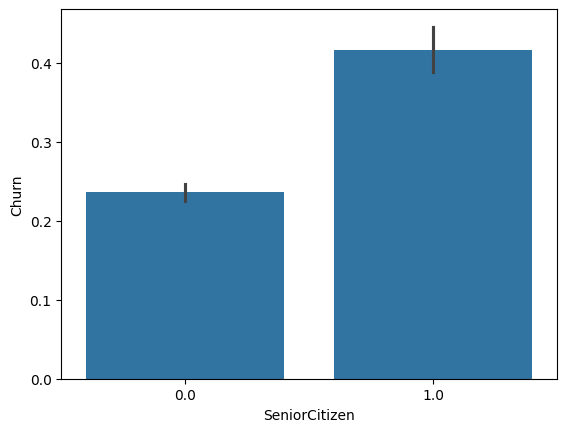

In [11]:
sns.barplot(x='SeniorCitizen', y='Churn', data=df4)
df4.drop('SeniorCitizen', axis=1, inplace=True)
df4.head()

<br>

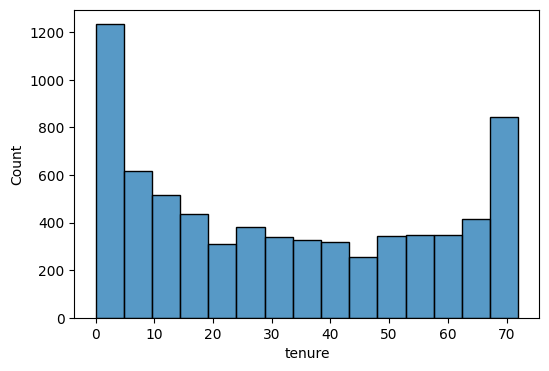

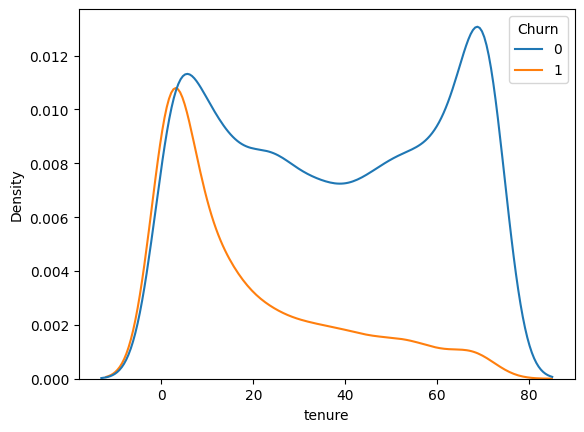

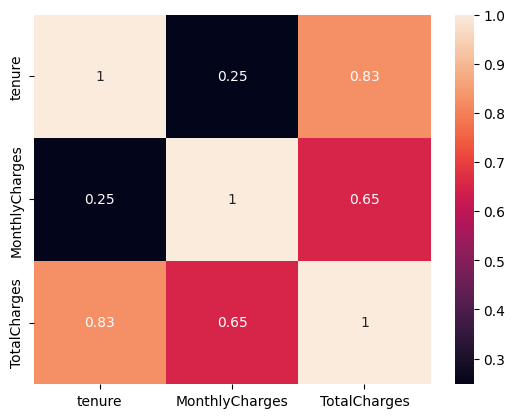

가장 높은 상관계수 값:  0.8261716050603637


In [12]:
plt.figure(figsize=(6, 4))

sns.histplot(data=df4, x='tenure')
plt.show()

sns.kdeplot(x='tenure', hue='Churn', data=df4)
plt.show()

no = df4[df4['Churn'] == 'No']['tenure'].mean()
yes = df4[df4['Churn'] == 'Yes']['tenure'].mean()
result = 'O' if no > yes else 'X'

sns.heatmap(df4[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True)
plt.show()

corr_cols = df4[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
corr_set = set(corr_cols.values.flatten())
corr_set = {value for value in corr_set if value != 1.0}
print('가장 높은 상관계수 값: ', max(corr_set))

<br>

In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 1 to 7041
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   Partner           7027 non-null   object 
 2   Dependents        7027 non-null   object 
 3   tenure            7027 non-null   int64  
 4   PhoneService      7027 non-null   object 
 5   MultipleLines     7027 non-null   object 
 6   InternetService   7027 non-null   object 
 7   OnlineSecurity    7027 non-null   object 
 8   OnlineBackup      7027 non-null   object 
 9   TechSupport       7027 non-null   object 
 10  StreamingTV       7027 non-null   object 
 11  StreamingMovies   7027 non-null   object 
 12  Contract          7027 non-null   object 
 13  PaperlessBilling  7027 non-null   object 
 14  PaymentMethod     7027 non-null   object 
 15  MonthlyCharges    7027 non-null   float64
 16  TotalCharges      7027 non-null   float64
 17  

In [14]:
object_cols = df4.select_dtypes(include='object').columns.values
df5 = pd.get_dummies(df4, columns=object_cols)
df5.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
5,8,99.65,820.50,1,True,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,False


## x y 분리

In [15]:
from sklearn.model_selection import train_test_split

X = df5.drop('Churn', axis=1)
y = df5['Churn']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## 스케일링

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)

## 모델링

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_s, y_train)

LogisticRegression()

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_s, y_train)

KNeighborsClassifier()

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train_s, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=3, random_state=42)
rf_model.fit(X_train_s, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [21]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=3, random_state=42)
xgb_model.fit(X_train_s, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [22]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=3, random_state=42)
lgbm_model.fit(X_train_s, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 1518, number of negative: 4103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 5621, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.270059 -> initscore=-0.994325
[LightGBM] [Info] Start training from score -0.994325


LGBMClassifier(n_estimators=3, random_state=42)

### 14. 바로 위 Light GBM 모델의 성능을 평가하려고 합니다.
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요.
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

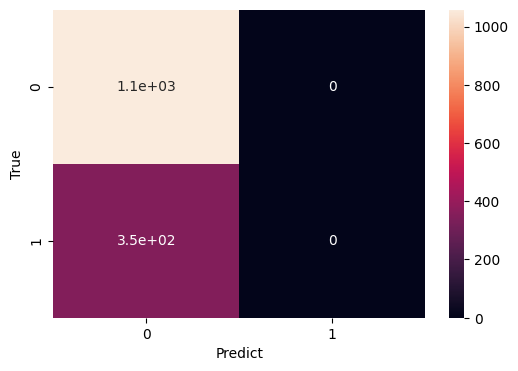

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1058
           1       0.00      0.00      0.00       348

    accuracy                           0.75      1406
   macro avg       0.38      0.50      0.43      1406
weighted avg       0.57      0.75      0.65      1406



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = lgbm_model.predict(X_valid_s)
conf_matrix = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predict")
plt.ylabel("True")
plt.show()

print("Classification Report: \n", classification_report(y_valid, y_pred))

## 딥러닝 모델링

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

In [25]:
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train_s.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', patience=3)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(X_train_s, y_train, epochs=30, validation_data=(X_valid_s, y_valid), batch_size=16, callbacks=[es, mc]).history

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.7467 - loss: 0.4915 - val_acc: 0.7937 - val_loss: 0.4311
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.7830 - loss: 0.4523 - val_acc: 0.7881 - val_loss: 0.4240
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7895 - loss: 0.4367 - val_acc: 0.8009 - val_loss: 0.4172
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.7876 - loss: 0.4332 - val_acc: 0.7973 - val_loss: 0.4186
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.7987 - loss: 0.4304 - val_acc: 0.8058 - val_loss: 0.4144
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8005 - loss: 0.4232 - val_acc: 0.8023 - val_loss: 0.4144
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7983 - loss: 0.4147 - val_acc: 0.8016 - val_loss: 0.4164
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8043 - loss: 0.4171 - val_acc: 0.8030 - val_loss: 0.4157
Epoch 9/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

<br>

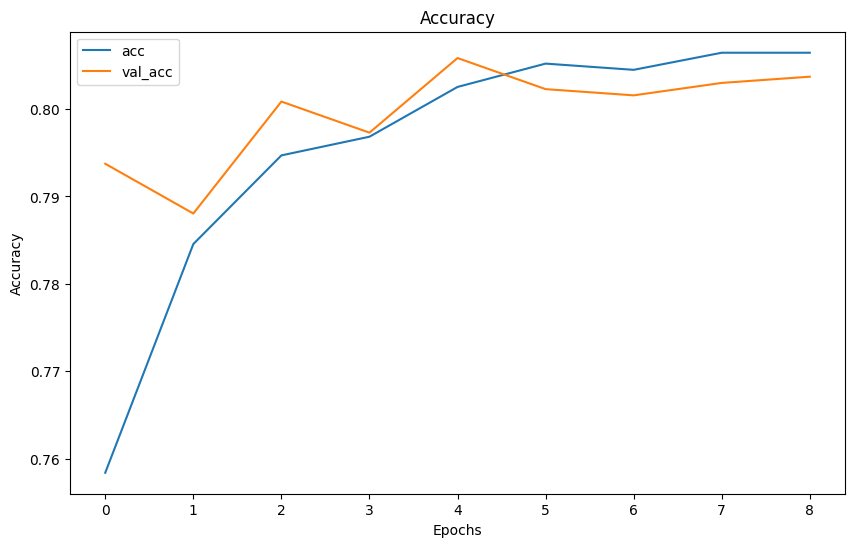

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(history['acc'], label='acc')
plt.plot(history['val_acc'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()